In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

## Build Box Points:

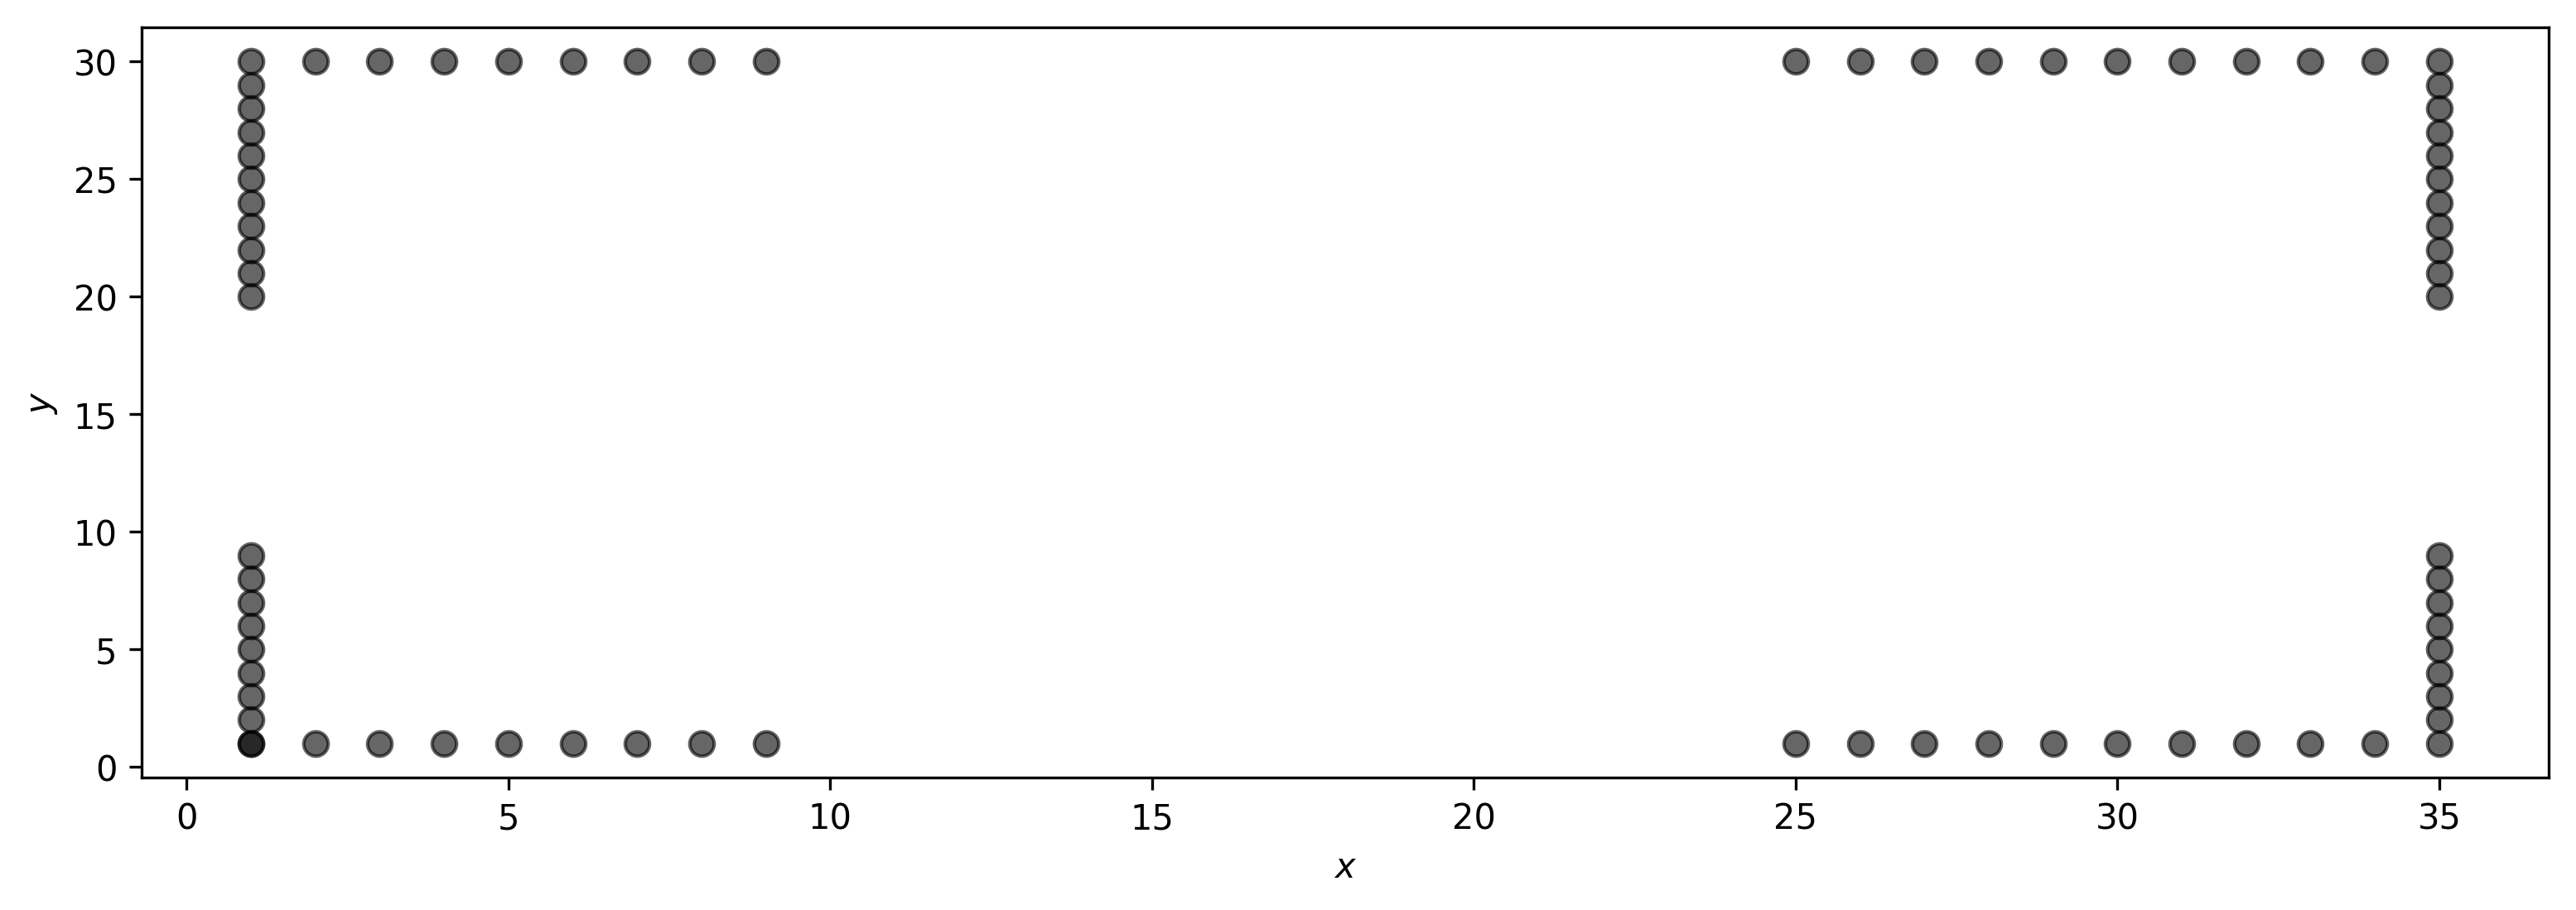

In [136]:
box_points = []
# left bottom corner point:
for x_point in range(1,10):
    box_points.append((x_point, 1))
    
for y_point in range(1, 10):
    box_points.append((1, y_point))
    
# rigth bottom corner point:
for x_point in range(25,35):
    box_points.append((x_point, 1))
    
for y_point in range(1, 10):
    box_points.append((35, y_point))

# left top corner point:
for y_point in range(20, 30):
    box_points.append((1, y_point))
    
for x_point in range(1,10):
    box_points.append((x_point, 30))
    
    
# rigth top corner point:
for x_point in range(25,35):
    box_points.append((x_point, 30))
    
for y_point in range(20, 31):
    box_points.append((35, y_point))


# plot the points:    
x_coords = [x_coord[0] for x_coord in box_points]
y_coords = [y_coord[1] for y_coord in box_points]

figsize(12.5, 4)
plt.scatter(x_coords, y_coords, color='k', s=50, alpha = 0.6)
plt.ylabel("$y$")
plt.xlabel("$x$");

# Line:

In [124]:
# box_points = []

# for x_point in range(1,20):
#     box_points.append((x_point, x_point))

# # box_points = [(5, 25), (20, 10)]

# # plot the points:    
# x_coords = [x_coord[0] for x_coord in box_points]
# y_coords = [y_coord[1] for y_coord in box_points]

# figsize(12.5, 4)
# plt.scatter(x_coords, y_coords, color='k', s=50, alpha = 0.6)

In [104]:
def round_to(n, precision):
    correction = 0.5 if n >= 0 else -0.5
    return int( n/precision+correction ) * precision

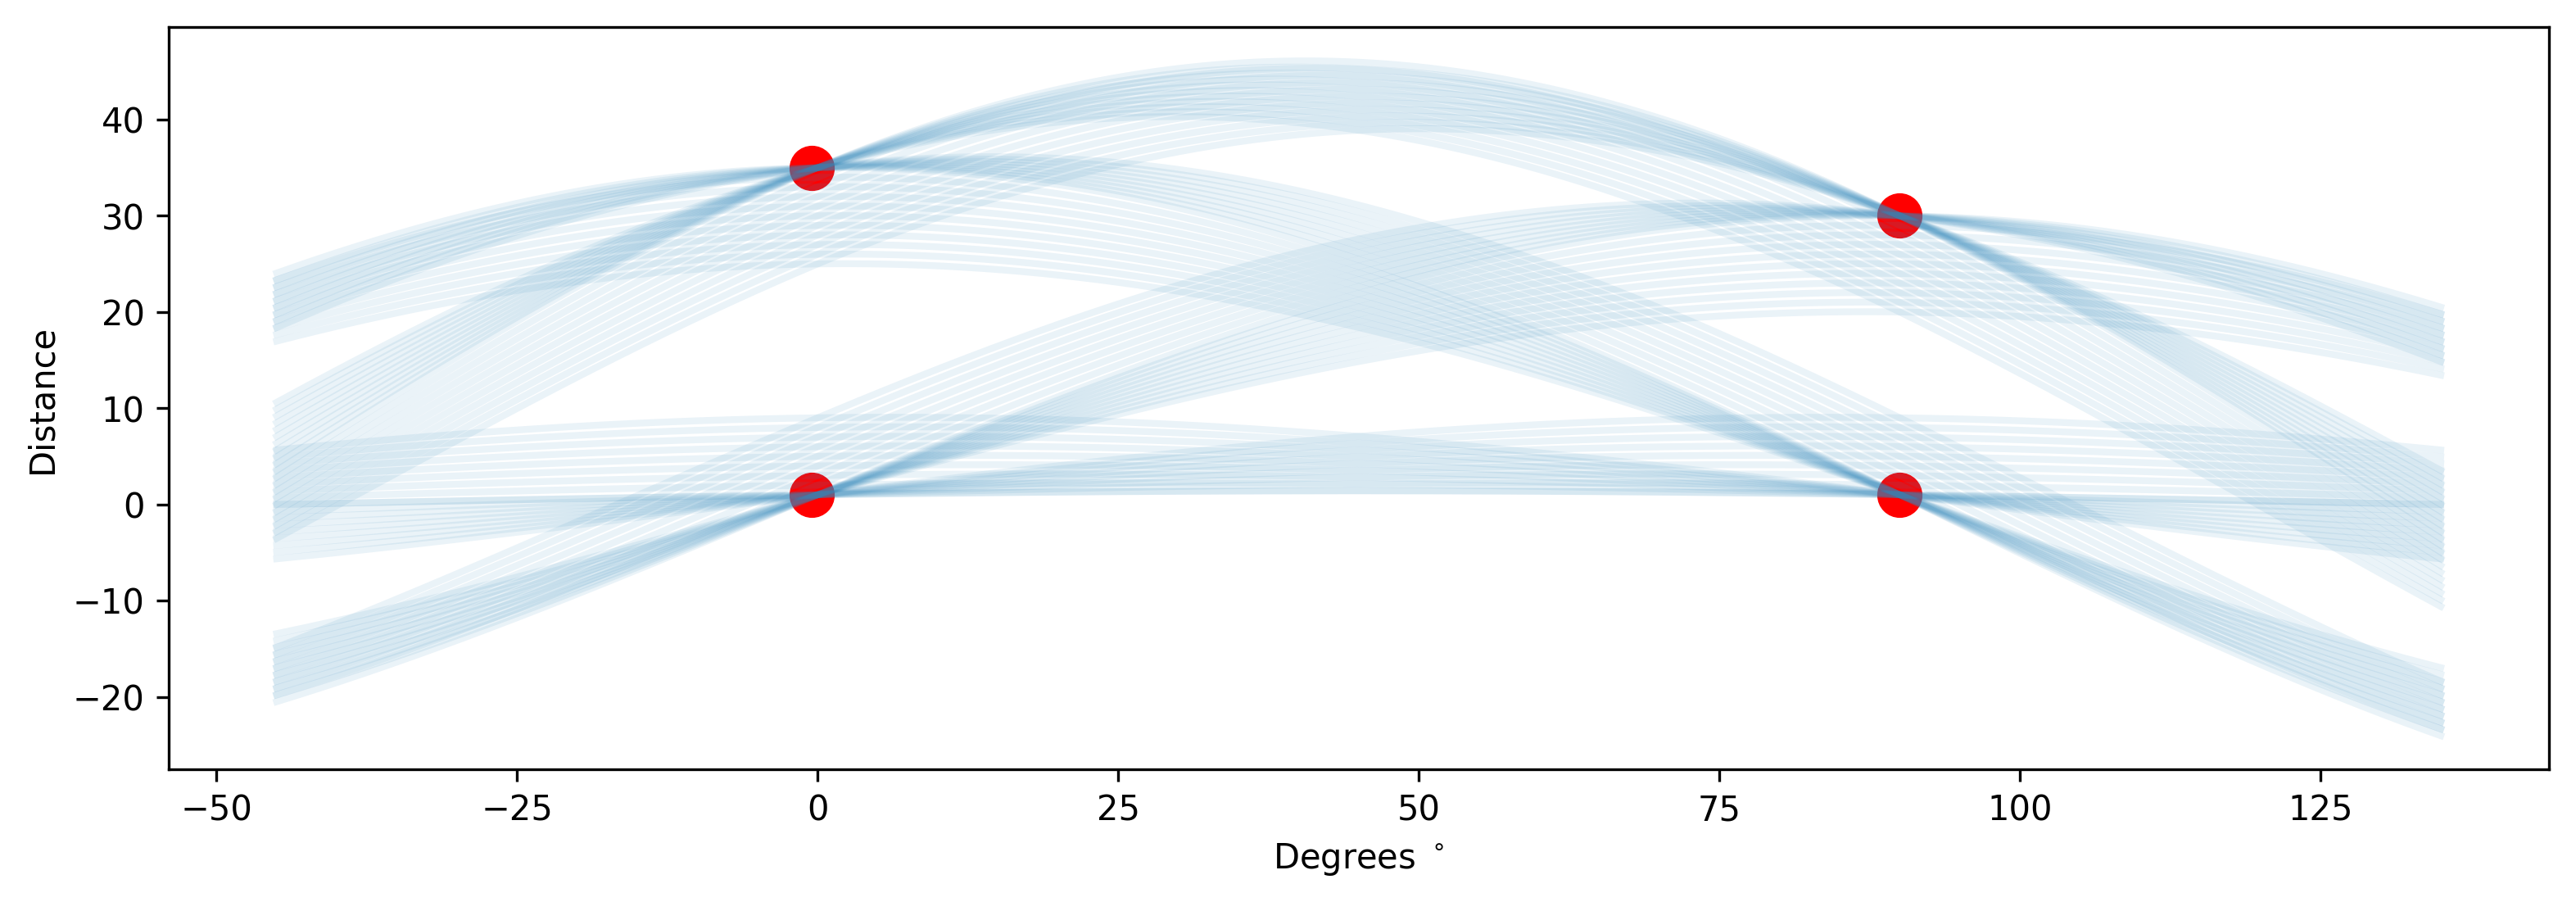

In [134]:
# degrees = np.linspace(-90, 90, 1000)
degrees = np.linspace(-45, 135, 1000)

precision = .5
hough_points = {}
bin_counts = {}
max_count = 0
max_bin = None
for point in box_points:
    for degree in degrees:
        d = point[0]*np.cos(degree*2*np.pi/360) + point[1]*np.sin(degree*2*np.pi/360)
        hough_points[d] = degree
        
        d_bin = round_to(d, precision)
        alpha_bin = round_to(degree, precision)
        
        bin_counts[(d_bin, alpha_bin)] = bin_counts.get((d_bin, alpha_bin), 0) + 1
        
        if bin_counts[(d_bin, alpha_bin)] > max_count:
            max_count = bin_counts[(d_bin, alpha_bin)]
            max_bin = (d_bin, alpha_bin)
        

reverse_bins = {}
for bin_key in bin_counts.keys():
        reverse_bins[bin_counts[bin_key]] = bin_key
        
for point in box_points:
    plt.plot(degrees , (point[0]*np.cos(degrees*2*np.pi/360) + point[1]*np.sin(degrees*2*np.pi/360)), lw=2, ls="-", alpha=0.1, color="#348ABD")
    
for bin_key in sorted(reverse_bins.keys(), reverse=True)[0:4]:
    x_point = reverse_bins[bin_key][1]
    y_point = reverse_bins[bin_key][0]
    
#     plt.scatter(x_point, y_point, marker='o', s=140, color="#A60628")
    plt.scatter(x_point, y_point, marker='o', s=150, color="r")        

plt.ylabel("Distance")
plt.xlabel("Degrees $^\circ$");